# <font style="color:black">Basic Image Enhancement Using Bitwise Operations</font>
Image Processing techniques take advantage of differnet logical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic logical operations like AND and OR operations. In this notebook we will take a look at some of the fundamental bitwise operations often used in computer vision pipelines.


In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
from IPython.display import Image


## Bitwise Operations

### <font style="color:rgb(8,133,37)">Function Syntax</font>

Example API for `cv2.bitwise_and()`. Others include: `cv2.bitwise_or()`, `cv2.bitwise_xor()`, `cv2.bitwise_not()`

``` python
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.
2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

https://docs.opencv.org/4.5.1/d0/d86/tutorial_py_image_arithmetics.html
https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14

(200, 499)


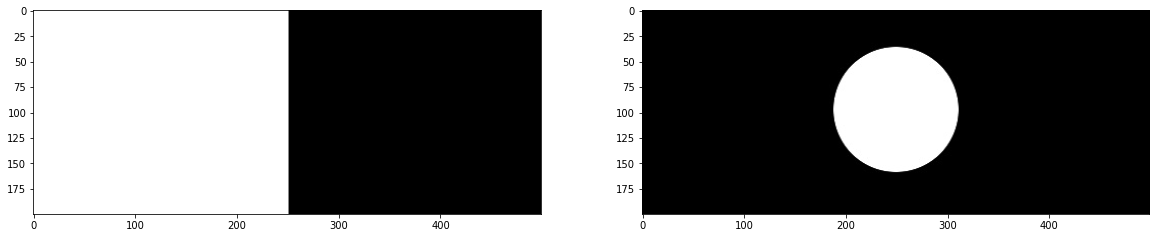

In [2]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_rec,cmap='gray')
plt.subplot(122);plt.imshow(img_cir,cmap='gray')
print(img_rec.shape)

### <font color="green">Bitwise AND Operator </font>

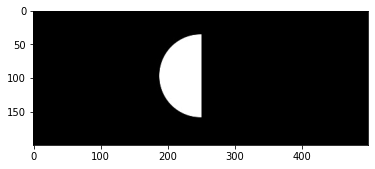

In [3]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

### <font color="green">Bitwise OR Operator </font>

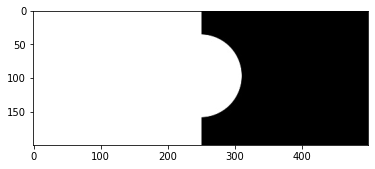

In [4]:
result = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

### <font color="green">Bitwise XOR Operator </font>

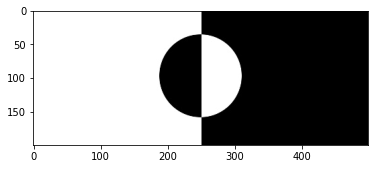

In [5]:
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result,cmap='gray')

## Application: Logo Manipulation

In this section we will show you how to fill in the white lettering of the Coca-Cola logo below with a background image.

### <font color="green">Read Foreground image</font>

(700, 700, 3)


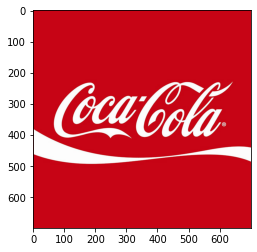

In [6]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

### <font color="green">Read Background image</font>

(700, 700, 3)


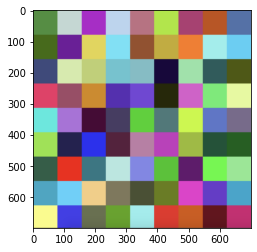

In [7]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb) 
print(img_background_rgb.shape)

### <font color="green">Create Mask for original Image</font>

(700, 700)


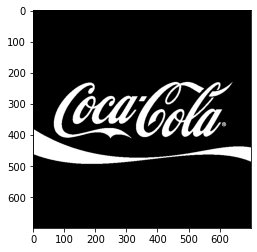

In [8]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

plt.imshow(img_mask,cmap="gray")
print(img_mask.shape)

### <font color="green">Invert the Mask </font>

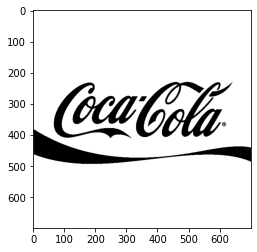

In [9]:
# Create an inverse mask
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap="gray")

### <font color="green">Apply background on the Mask</font>

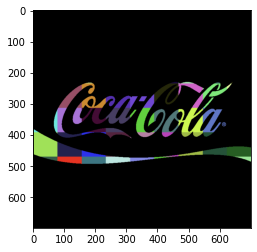

In [10]:
# Create colorful background "behind" the logo lettering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### <font color="green">Isolate foreground from image</font>

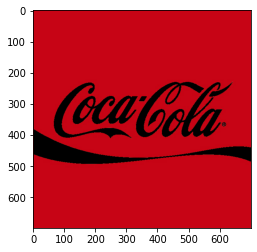

In [11]:
# Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### <font color="green">Result: Merge Foreground and Background</font>

True

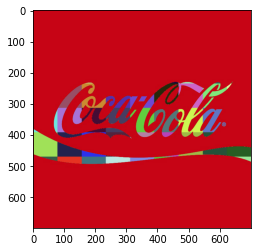

In [12]:
# Add the two previous results obtain the final result
result = cv2.add(img_background,img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:,:,::-1])

## Thank You!